In [1]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from time import time


initial = time()


## gap_eq をdef
def e_k_spin(k1, k2, q, y, B): 
    return 2*t*(np.cos(a*(k1+q/2))+np.cos(a*(k2))) - u + y * 1/2 * gu * B

def e_k_s(k1, k2, q, B):
    return (e_k_spin(k1, k2, q, 1, B) + e_k_spin(-1*k1, k2, q, -1, B))/2

def e_k_a(k1, k2, q, B):
    return (e_k_spin(k1, k2, q, 1, B) - e_k_spin(-1*k1, k2, q, -1, B))/2

def E_k_q(k1, k2, gap, q, B):
    return np.sqrt(e_k_s(k1, k2, q, B)**2 + gap**2)

def E_k_q_s(k1, k2, gap, q, y, B):
    return E_k_q(k1, k2, gap, q, B) + y * e_k_a(k1, k2, q, B)

def Fermi(beta, E):
    return 1 / (np.exp(beta*E) + 1 )

def func(k1, k2, gap, q, B): 
    return gap*(1-Fermi(beta, E_k_q_s(k1, k2, gap, q, -1, B))-Fermi(beta, E_k_q_s(k1, k2, gap, q, 1, B)))/(2*E_k_q(k1, k2, gap, q, B))

def rhs(gap, q, B):
    k1 = -1 * np.pi/a + 2 * arange(N) * np.pi / (a * N)
    kx, ky = meshgrid(k1, k1, indexing='ij')
    f = func(kx, ky, gap, q, B)
    return (V / (N**2)) * sum(f)


##pippard_length の定義

def V_x_tight_binding(kx):
    return -2*t*a*(np.sin(a*(kx)))

def V_y_tight_binding(ky):
    return -2*t*a*(np.sin(a*(ky)))

def V_tight_binding(kx, ky):
    return np.sqrt(Vf_x_tight_binding(kx, ky)**2 + Vf_y_tight_binding(kx, ky)**2)

def average_Vf_tight_binding(kx, ky):
    i = 0
    sum = 0
    for i in range (len(kx))
        for j in range (len(ky))
            if abs(e_k_spin(kx[i], ky[j], q, y, B)) < 0.01:
                sum = sum + V_tight_binding(kx[i], ky[j])
                i = i + 1
    return  sum/i


def pippard_length_tight_binding(kx, ky, gap):
    return h*Vf_tight_binding(kx, ky)/ gap*np.pi


##パラメータの調整
N, V, t, a, u, gu, n0, n1, n2, h =100, 1, 1, 1, 0, 1, 1, 1, 50, 1    # 7.525 #9.21
qs   = np.linspace(0.0,0.2,n0)  #(np.pi/a)
Bs   = np.linspace(0.0,0.1,n1)     #np.linspace(0,0.08,n1)
kBTs = np.linspace(0.001,0.05,n2)


##ギャップの逐次計算
ans = []
for h in range(n0):
    ans0 = []
    for i in range(n1):
        ans1 = []
        for j in range(n2): # それぞれの温度で秩序パラメータを計算
            beta, d0 = 1/kBTs[j], 100.0
            for k in range(1000): # 収束するまで最大1000回ループ
                d1 = rhs(d0, qs[h], Bs[i]) 
                if abs(d1-d0) < 1e-10: break # 収束チェック
                d0 = d1
            ans1.append([d0, abs(d1-d0), k])
        ans0.append(ans1)
    ans.append(ans0)
ans = np.array(ans)


##メッシュをはる
k1 = -1 * np.pi/a + 2 * arange(N) * np.pi / (a * N)
print(k1)
kx , ky = meshgrid(k1, k1, indexing='ij')


p_l = pippard_length_tight_binding(kx, ky, ans[0][0]).tolist()


##gapのq依存
figure = plt.scatter(kBTs,p_l)
c= plt.colorbar()
plt.savefig("pippard_length.png")
plt.show()

/var/folders/vf/842hmrqn18z65j0fs1m3p8200000gn/T/ipykernel_13202/2003303191.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (np.exp(beta*E) + 1 )


[-3.14159265 -3.0787608  -3.01592895 -2.95309709 -2.89026524 -2.82743339
 -2.76460154 -2.70176968 -2.63893783 -2.57610598 -2.51327412 -2.45044227
 -2.38761042 -2.32477856 -2.26194671 -2.19911486 -2.136283   -2.07345115
 -2.0106193  -1.94778745 -1.88495559 -1.82212374 -1.75929189 -1.69646003
 -1.63362818 -1.57079633 -1.50796447 -1.44513262 -1.38230077 -1.31946891
 -1.25663706 -1.19380521 -1.13097336 -1.0681415  -1.00530965 -0.9424778
 -0.87964594 -0.81681409 -0.75398224 -0.69115038 -0.62831853 -0.56548668
 -0.50265482 -0.43982297 -0.37699112 -0.31415927 -0.25132741 -0.18849556
 -0.12566371 -0.06283185  0.          0.06283185  0.12566371  0.18849556
  0.25132741  0.31415927  0.37699112  0.43982297  0.50265482  0.56548668
  0.62831853  0.69115038  0.75398224  0.81681409  0.87964594  0.9424778
  1.00530965  1.0681415   1.13097336  1.19380521  1.25663706  1.31946891
  1.38230077  1.44513262  1.50796447  1.57079633  1.63362818  1.69646003
  1.75929189  1.82212374  1.88495559  1.94778745  2.0

TypeError: Vf_x_tight_binding() takes 1 positional argument but 2 were given

[[[[0.06061998]
   [0.06061998]
   [0.06061998]
   [0.06061998]
   [0.06061997]
   [0.06061993]
   [0.06061965]
   [0.06061859]
   [0.06061555]
   [0.06060862]
   [0.06059519]
   [0.06057206]
   [0.06053571]
   [0.06048245]
   [0.0604086 ]
   [0.06031061]
   [0.0601851 ]
   [0.06002889]
   [0.05983899]
   [0.05961264]
   [0.05934717]
   [0.05904008]
   [0.05868892]
   [0.05829128]
   [0.05784478]
   [0.05734695]
   [0.05679528]
   [0.0561871 ]
   [0.05551958]
   [0.05478965]
   [0.05399395]
   [0.05312877]
   [0.05218995]
   [0.05117276]
   [0.05007181]
   [0.04888085]
   [0.04759257]
   [0.04619829]
   [0.04468758]
   [0.0430477 ]
   [0.04126275]
   [0.03931252]
   [0.03717052]
   [0.0348009 ]
   [0.03215289]
   [0.02915021]
   [0.02566817]
   [0.02147423]
   [0.01601789]
   [0.00696012]]]]
[0.06061998]
[5.25090749]
[0.06061998]
[5.25090749]
[0.06061998]
[5.25090749]
[0.06061998]
[5.2509075]
[0.06061997]
[5.2509078]
[0.06061993]
[5.25091164]
[0.06061965]
[5.2509354]
[0.06061859]
[5.25

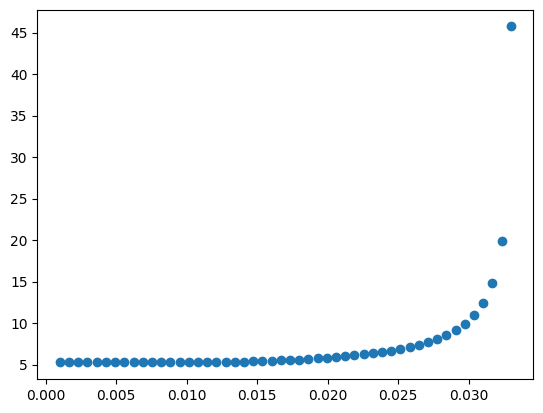

In [26]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from time import time


initial = time()


## gap_eq をdef
def e_k_spin(k1, k2, q, y, B): 
    return 2*t*(np.cos(a*(k1+q/2))+np.cos(a*(k2))) - u + y * 1/2 * gu * B

def e_k_s(k1, k2, q, B):
    return (e_k_spin(k1, k2, q, 1, B) + e_k_spin(-1*k1, k2, q, -1, B))/2

def e_k_a(k1, k2, q, B):
    return (e_k_spin(k1, k2, q, 1, B) - e_k_spin(-1*k1, k2, q, -1, B))/2

def E_k_q(k1, k2, gap, q, B):
    return np.sqrt(e_k_s(k1, k2, q, B)**2 + gap**2)

def E_k_q_s(k1, k2, gap, q, y, B):
    return E_k_q(k1, k2, gap, q, B) + y * e_k_a(k1, k2, q, B)

def Fermi(beta, E):
    return (1-np.tanh(beta*E/2))/2

def func(k1, k2, gap, q, B): 
    return gap*(1-Fermi(beta, E_k_q_s(k1, k2, gap, q, -1, B))-Fermi(beta, E_k_q_s(k1, k2, gap, q, 1, B)))/(2*E_k_q(k1, k2, gap, q, B))

def rhs(gap, q, B):
    k1 = -1 * np.pi/a + 2 * arange(N) * np.pi / (a * N)
    kx, ky = meshgrid(k1, k1, indexing='ij')
    f = func(kx, ky, gap, q, B)
    return (V / (N**2)) * sum(f)

def pippard_length_tight_binding(gap):
    return 1 / (gap * np.pi)



##パラメータの調整
N, V, t, a, u, gu, n0, n1, n2, h =100, 1, 1, 1, 0, 1, 1, 1, 50, 1    # 7.525 #9.21
qs   = np.linspace(0.0,0.2,n0)  #(np.pi/a)
Bs   = np.linspace(0.0,0.1,n1)     #np.linspace(0,0.08,n1)
kBTs = np.linspace(0.001,0.033,n2)


##ギャップの逐次計算
ans = []
for h in range(n0):
    ans0 = []
    for i in range(n1):
        ans1 = []
        for j in range(n2): # それぞれの温度で秩序パラメータを計算
            beta, d0 = 1/kBTs[j], 100.0
            for k in range(1000): # 収束するまで最大1000回ループ
                d1 = rhs(d0, qs[h], Bs[i]) 
                if abs(d1-d0) < 1e-10: break # 収束チェック
                d0 = d1
            ans1.append([d0])
        ans0.append(ans1)
    ans.append(ans0)
ans = np.array(ans)

print(ans)
p_l = []
for i in range(n2):
    print(ans[0][0][i])
    a = pippard_length_tight_binding(ans[0][0][i])
    print(a)
    p_l.append(a) 



##coherence length　計算
figure = plt.scatter(kBTs , p_l)
plt.savefig("pippard_length.png")
plt.show()